In [27]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/Users/andrew/Desktop/community_notes_2/2k_final.csv')

df['has_note'] = df['note_text'].apply(lambda x: not pd.isnull(x) and x.strip() != '')

df.to_csv('/Users/andrew/Desktop/community_notes_2/2k_final.csv', index=False)

In [3]:
# Read the CSV files into pandas DataFrames
processed_scrape = pd.read_csv("/Users/andrew/Desktop/community_notes_2/2k_final.csv")
community_notes_m = pd.read_csv("/Users/andrew/Desktop/community_notes_2/dataset/community_notes_m.csv")

# Create an empty column in processed_scrape called 'all_notes'
processed_scrape['all_notes'] = ''

# Iterate through each row in processed_scrape
for index, row in processed_scrape.iterrows():
    tweet_id = row['tweet_id']
    
    # Filter community_notes_m DataFrame to get all rows with the same tweet_id
    matching_rows = community_notes_m[community_notes_m['tweet_id'] == tweet_id]
    
    # Create a list to store summaries
    summaries = []
    
    # Loop through the matching rows and store their summary
    for _, match_row in matching_rows.iterrows():
        summaries.append(str(match_row['summary']))
        
    # Join the list of summaries with '|||' and update the 'all_notes' column
    processed_scrape.at[index, 'all_notes'] = '|||'.join(summaries)

# Write the updated DataFrame back to a new CSV file
processed_scrape.to_csv("/Users/andrew/Desktop/community_notes_2/2k_final.csv", index=False)


/var/folders/nk/5zcc814x561cbxxgrncjyscw0000gn/T/ipykernel_84177/1959069615.py:3: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  community_notes_m = pd.read_csv("/Users/andrew/Desktop/community_notes_2/dataset/community_notes_m.csv")


In [4]:
processed_scrape['num_notes'] = processed_scrape['all_notes'].apply(lambda x: 1 + x.count('|||'))

processed_scrape.to_csv("/Users/andrew/Desktop/community_notes_2/2k_final.csv", index=False)


In [5]:
processed_scrape = pd.read_csv("/Users/andrew/Desktop/community_notes_2/2k_final.csv")
community_notes_m = pd.read_csv("/Users/andrew/Desktop/community_notes_2/dataset/community_notes_m.csv")
# Initialize an empty list to store the note_ids
note_ids_list = []

# Loop through each row in processed_scrape
for index, row in processed_scrape.iterrows():
    tweet_id = row['tweet_id']
    
    # Find all rows in community_notes_m that have the same tweet_id
    matching_rows = community_notes_m[community_notes_m['tweet_id'] == tweet_id]
    
    # Grab the 'noteId' from these rows and join them into a comma-separated string
    note_ids = ",".join(matching_rows['noteId'].astype(str).tolist())
    
    # Append to list
    note_ids_list.append(note_ids)

# Add the note_ids as a new column to processed_scrape
processed_scrape['note_ids'] = note_ids_list

# Save the updated DataFrame back to a new CSV file
processed_scrape.to_csv("2k_final.csv", index=False)

/var/folders/nk/5zcc814x561cbxxgrncjyscw0000gn/T/ipykernel_84177/4184978382.py:2: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  community_notes_m = pd.read_csv("/Users/andrew/Desktop/community_notes_2/dataset/community_notes_m.csv")


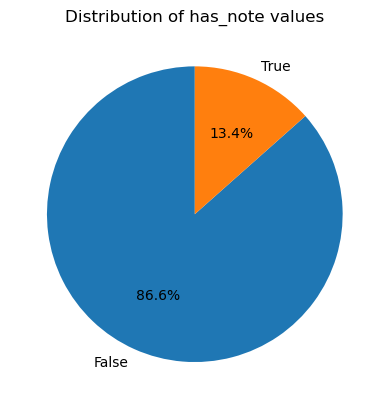

In [6]:
df = pd.read_csv('2k_final.csv')

# Pie chart for the 'has_note' column
has_note_counts = df['has_note'].value_counts()
has_note_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of has_note values')
plt.ylabel('')  # Hide the 'has_note' label on the y-axis
plt.show()

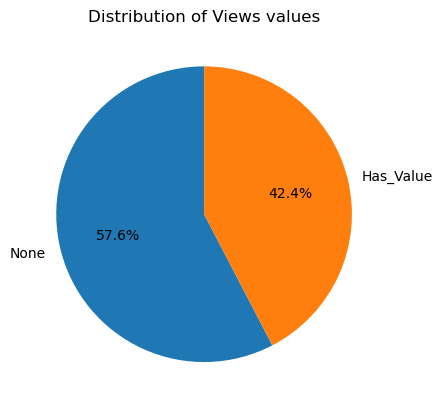

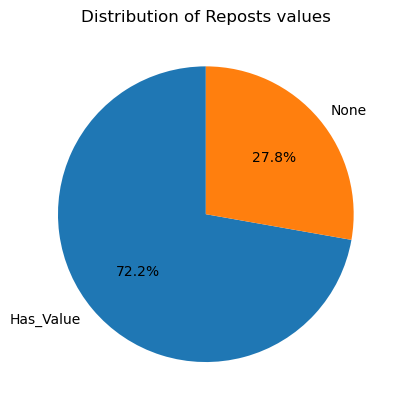

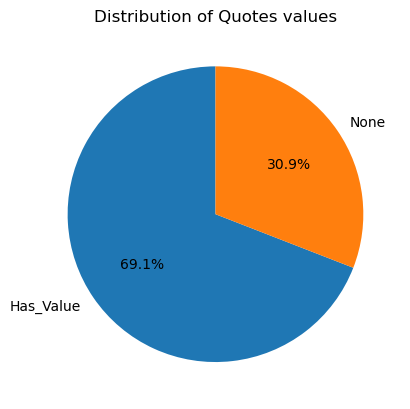

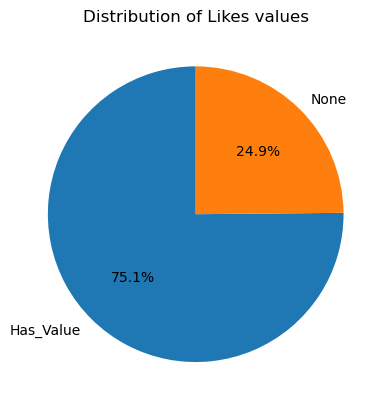

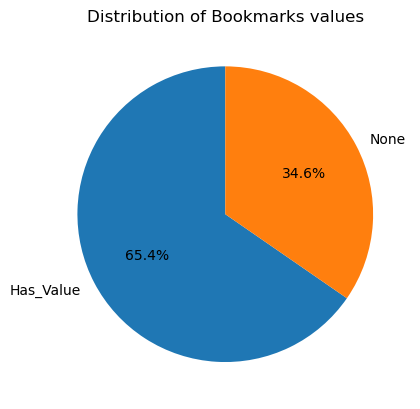

In [7]:
columns_to_plot = ['Views', 'Reposts', 'Quotes', 'Likes', 'Bookmarks']

for column in columns_to_plot:
    # Create a new Series where values are '0' or 'non-zero'
    column_counts = df[column].apply(lambda x: 'None' if x == "None" else 'Has_Value').value_counts()
    column_counts.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {column} values')
    plt.ylabel('')  # Hide the column name label on the y-axis
    plt.show()

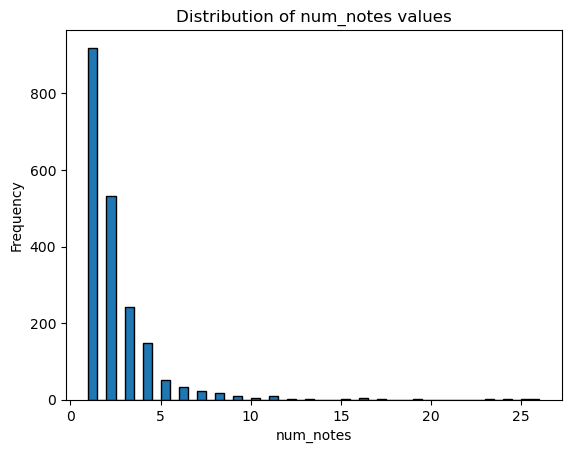

In [8]:
#Histogram for the 'num_notes' column
plt.hist(df['num_notes'], bins=50, edgecolor='black')
plt.title('Distribution of num_notes values')
plt.xlabel('num_notes')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Load the CSV file into a DataFrame
df = pd.read_csv('2k_final.csv')

# Convert the 'Likes' column to numeric, setting errors='coerce' to turn "None" and other non-numeric values into NaN
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')

# Drop rows where 'Likes' is NaN
df = df.dropna(subset=['Likes'])

# Group by 'has_note' and calculate the mean for 'Likes'
average_likes = df.groupby('has_note')['Likes'].mean()

print(average_likes)

has_note
False    23765.306984
True     37050.891509
Name: Likes, dtype: float64


In [10]:
df = pd.read_csv('2k_final.csv')

# List of metrics
metrics = ['Views', 'Reposts', 'Quotes', 'Likes', 'Bookmarks']

# Convert each metric column to numeric
for metric in metrics:
    df[metric] = pd.to_numeric(df[metric], errors='coerce')

# Calculate the mean for each metric
average_values = df[metrics].mean()

print(average_values)

Views        3.191267e+06
Reposts      4.453880e+03
Quotes       1.166350e+03
Likes        2.562441e+04
Bookmarks    4.899476e+02
dtype: float64


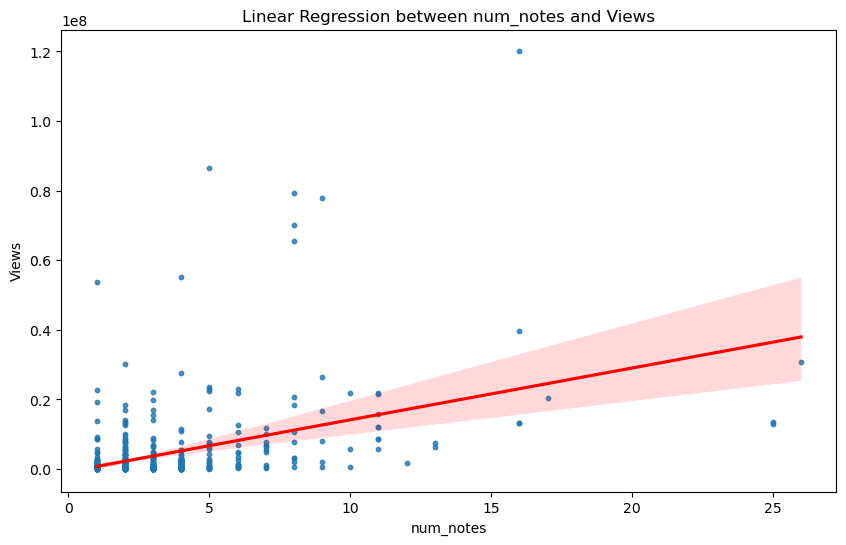

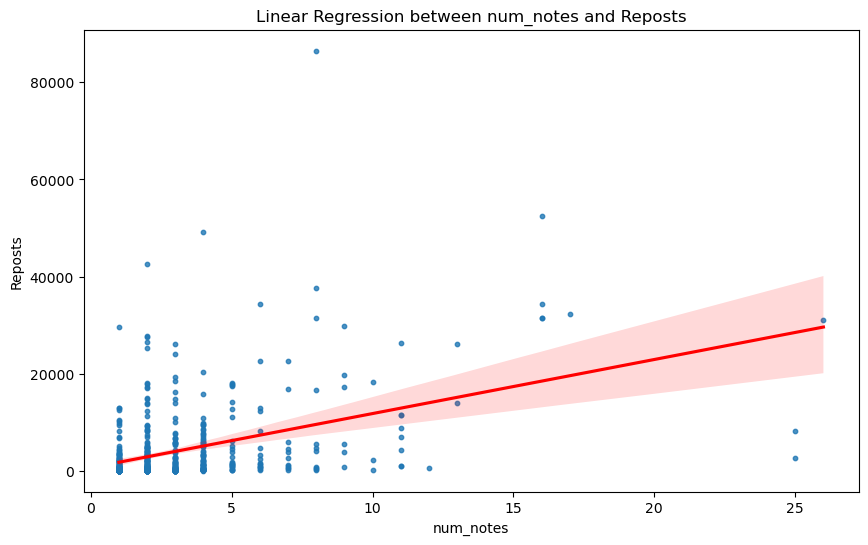

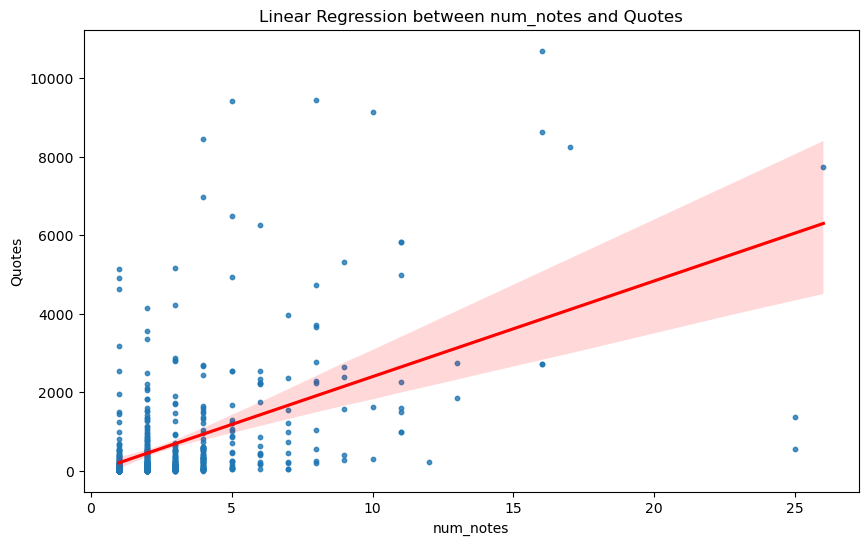

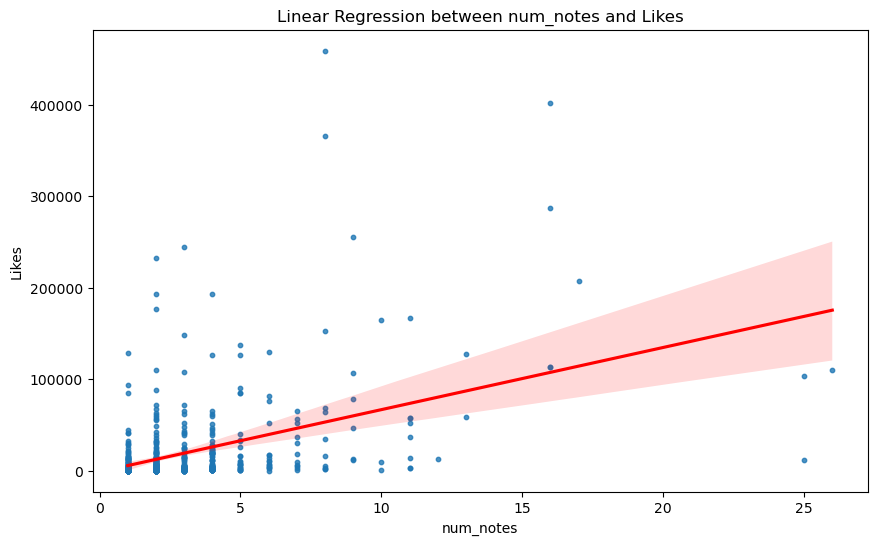

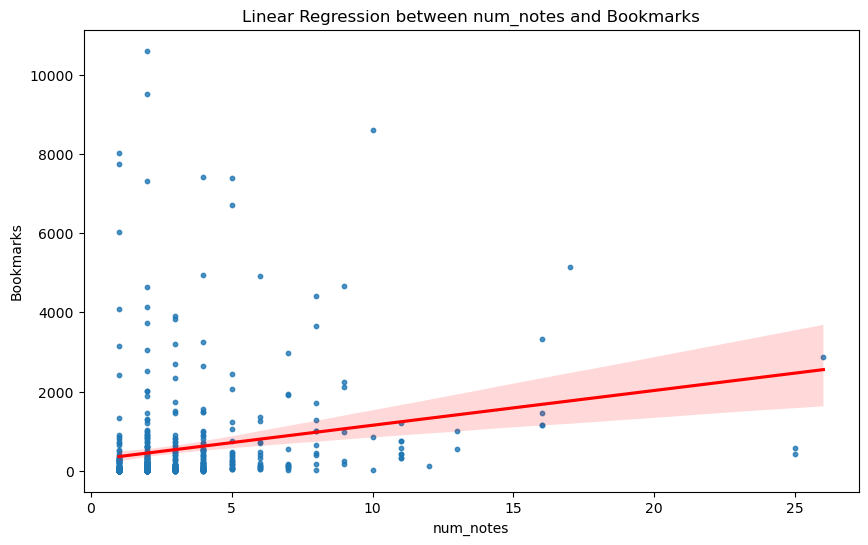

In [11]:
# Load the CSV file into a DataFrame
df = pd.read_csv('2k_final.csv')

# List of metrics
metrics = ['Views', 'Reposts', 'Quotes', 'Likes', 'Bookmarks']

# Convert each metric column and num_notes to numeric
for metric in metrics:
    df[metric] = pd.to_numeric(df[metric], errors='coerce')
df['num_notes'] = pd.to_numeric(df['num_notes'], errors='coerce')

# Drop rows with NaN values in num_notes and each metric
df = df.dropna(subset=['num_notes'] + metrics)

# Create linear regression plots
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.regplot(x='num_notes', y=metric, data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
    plt.title(f'Linear Regression between num_notes and {metric}')
    plt.show()


In [12]:
file_path = "/Users/andrew/Desktop/community_notes_2/data_analysis/mfd2.0.dic"
hashmap = {}

with open(file_path, "r") as file:
    for line in file:
        line = line.strip()
        
        if not line or line.startswith("%"):
            continue
        
        phrase, header = line.split("\t")
        hashmap[phrase] = header

print(hashmap)

{'1': 'care.virtue', '2': 'care.vice', '3': 'fairness.virtue', '4': 'fairness.vice', '5': 'loyalty.virtue', '6': 'loyalty.vice', '7': 'authority.virtue', '8': 'authority.vice', '9': 'sanctity.virtue', '10': 'sanctity.vice', 'compassion': '1', 'empathy': '1', 'kindness': '1', 'caring': '1', 'generosity': '1', 'benevolence': '1', 'altruism': '1', 'compassionate': '1', 'nurture': '1', 'gentleness': '1', 'nurturance': '1', 'sympathy': '1', 'nurturing': '1', 'motherly': '1', 'love': '1', 'beneficence': '1', 'empathize': '1', 'helpfulness': '1', 'loving': '1', 'pity': '1', 'mercy': '1', 'nurturer': '1', 'compassionately': '1', 'nurturers': '1', 'caringly': '1', 'empathising': '1', 'merciful': '1', 'empathizing': '1', 'nurtures': '1', 'warmhearted': '1', 'empathizers': '1', 'protectiveness': '1', 'nurtured': '1', 'benevolent': '1', 'mothering': '1', 'cared': '1', 'healing': '1', 'empathises': '1', 'humane': '1', 'comfort': '1', 'pitied': '1', 'loved': '1', 'altruist': '1', 'cares': '1', 'pity

In [13]:
words = []

with open(file_path, "r") as file:
    for line in file:
        line = line.strip()
        
        if not line or line.startswith("%"):
            continue
        
        phrase, header = line.split("\t")
        words.append(phrase)

print(words)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'compassion', 'empathy', 'kindness', 'caring', 'generosity', 'benevolence', 'altruism', 'compassionate', 'nurture', 'gentleness', 'nurturance', 'sympathy', 'nurturing', 'motherly', 'love', 'beneficence', 'empathize', 'helpfulness', 'loving', 'pity', 'mercy', 'nurturer', 'compassionately', 'nurturers', 'caringly', 'empathising', 'merciful', 'empathizing', 'nurtures', 'warmhearted', 'empathizers', 'protectiveness', 'nurtured', 'benevolent', 'mothering', 'cared', 'healing', 'empathises', 'humane', 'comfort', 'pitied', 'loved', 'altruist', 'cares', 'pitying', 'comforted', 'hug', 'comforting', 'consoling', 'empathizes', 'sympathize', 'care', 'caregiver', 'empathised', 'hugs', 'heal', 'generous', 'condolences', 'mothered', 'charitable', 'generously', 'pities', 'condolence', 'help', 'consolingly', 'solace', 'mother', 'healer', 'hospitality', 'charity', 'empathized', 'healers', 'pityingly', 'mothers', 'child', 'lovingly', 'parenting', 'rescui

In [18]:
# Read the combined CSV file
df = pd.read_csv("/Users/andrew/Desktop/community_notes_2/2k_final.csv")

# Columns to be added with zero values
columns = ['care.virtue', 'care.vice', 'fairness.virtue', 'fairness.vice',
           'loyalty.virtue', 'loyalty.vice', 'authority.virtue', 'authority.vice',
           'sanctity.virtue', 'sanctity.vice']

# Add new columns with zero values
for column in columns:
    df[column] = 0

# Save the updated DataFrame to the final CSV file
df.to_csv("/Users/andrew/Desktop/community_notes_2/2k_final_m.csv", index=False)

print("done")

done


In [23]:
def update_dataframe(index, row, df, words, hashmap):
    # Check if 'tweet_text' is a string
    if isinstance(row.tweet_text, str):
        for word in words:
            if word in row.tweet_text and not word.isdigit():
                word_key = hashmap[word]
                final_key = hashmap[word_key]
                df.at[index, final_key] += 1
                print(f"Just added one at {row.tweet_text} and {final_key}")

# Use enumerate to iterate over DataFrame rows with an index
for index, row in enumerate(df.itertuples(index=True)):
    update_dataframe(index, row, df, words, hashmap)

# Save the modified DataFrame to a CSV file
df.to_csv("2k_final_md.csv", index=False)


Just added one at ...and my father has even been wearing a wire at the FBI’s direction to catch these criminals. The planted leak to the FBI tonight was intended to thwart that investigation.  No part of the allegations against me are true, and the people pushing these lies are targets... and loyalty.virtue
Just added one at ...and my father has even been wearing a wire at the FBI’s direction to catch these criminals. The planted leak to the FBI tonight was intended to thwart that investigation.  No part of the allegations against me are true, and the people pushing these lies are targets... and authority.virtue
Just added one at ...and my father has even been wearing a wire at the FBI’s direction to catch these criminals. The planted leak to the FBI tonight was intended to thwart that investigation.  No part of the allegations against me are true, and the people pushing these lies are targets... and sanctity.vice
Just added one at The January 6 Committee is an unconstitutional politic

In [24]:
# List of columns to sum
columns_to_sum = [
    'care.virtue', 'care.vice', 
    'fairness.virtue', 'fairness.vice', 
    'loyalty.virtue', 'loyalty.vice', 
    'authority.virtue', 'authority.vice', 
    'sanctity.virtue', 'sanctity.vice'
]

# Add the 'moralization' column as the sum of the specified columns
df['moralization'] = df[columns_to_sum].sum(axis=1)

# Save the modified DataFrame to a CSV file (optional)
df.to_csv("2k_final_m.csv", index=False)


In [39]:
# Convert "None" values in 'Views' to NaN and convert the column to numeric
df['Views'] = pd.to_numeric(df['Views'].replace('None', np.nan), errors='coerce')

# Create the 'prob_of_note' column, handling division by zero
df['prob_of_note'] = np.where(df['Views'] != 0, df['num_notes'] / df['Views'], np.nan)

# Save the modified DataFrame to a CSV file (optional)
df.to_csv("2k_final_m.csv", index=False)


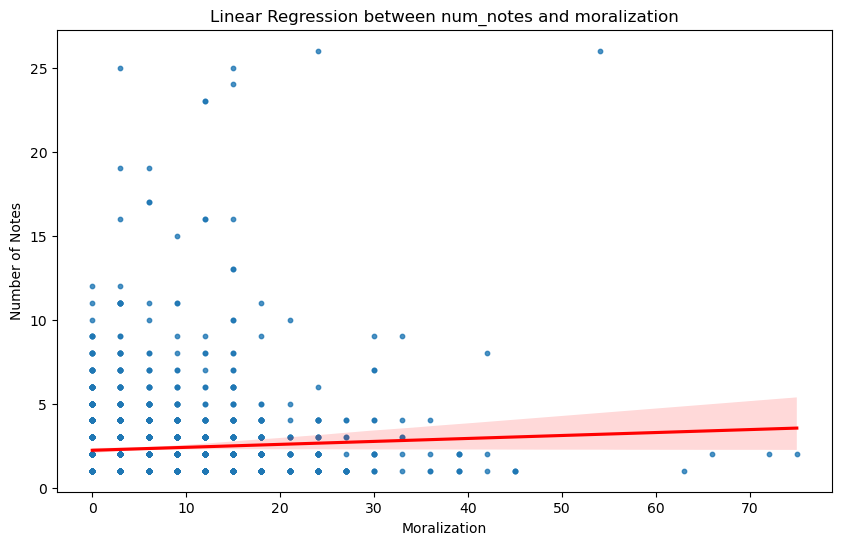

In [31]:
df = pd.read_csv('/Users/andrew/Desktop/community_notes_2/2k_final_m.csv')

# Drop rows with NaN values in 'num_notes' and 'moralization'
df_cleaned = df.dropna(subset=['num_notes', 'moralization'])

# Create a linear regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='moralization', y='num_notes', data=df_cleaned, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Linear Regression between num_notes and moralization')
plt.xlabel('Moralization')
plt.ylabel('Number of Notes')
plt.show()

In [37]:
df = pd.read_csv('/Users/andrew/Desktop/community_notes_2/2k_final_m.csv')

# After modifying the 'prob_of_note' column
df['prob_of_note'] = df['prob_of_note'] * 10

# Save the modified DataFrame back to the same CSV file
df.to_csv('2k_final_m.csv', index=False)

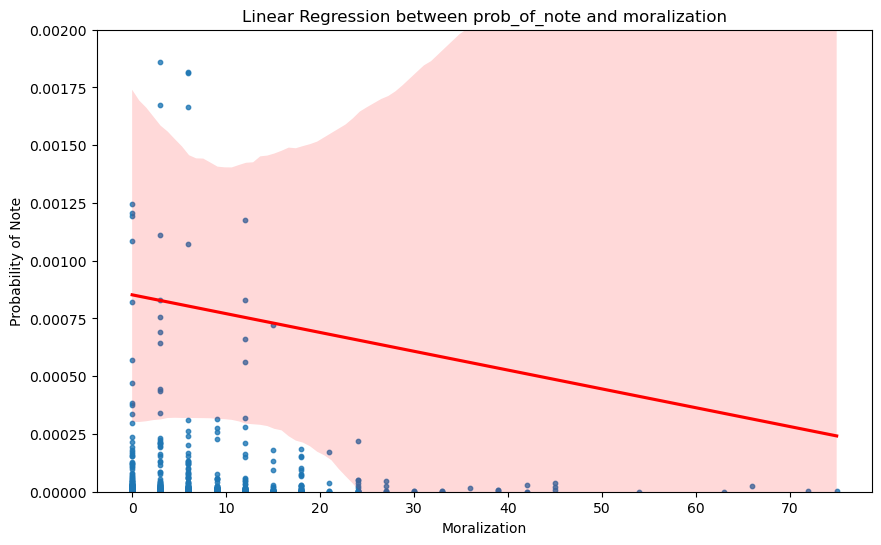

In [41]:
df = pd.read_csv('/Users/andrew/Desktop/community_notes_2/2k_final_m.csv')

df_cleaned = df.dropna(subset=['prob_of_note', 'moralization'])

# Create a linear regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='moralization', y='prob_of_note', data=df_cleaned, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Linear Regression between prob_of_note and moralization')
plt.xlabel('Moralization')
plt.ylabel('Probability of Note')

# Set the y-axis limits
plt.ylim(0.0, 0.002)

plt.show()
